# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
from glob import glob


# custom modules
from loadData import LoadBin
from visualize.plots import Plots

In [2]:
ldBin_ob = LoadBin()
plt_ob = Plots()

# Required Binaries

In [3]:
# dictionaries
c = joblib.load("./picklefiles/DICT")
rc = joblib.load("./picklefiles/REVERSE_DICT")

# dataframes
img_path_df = joblib.load("./picklefiles/img_path_df")
train_master_df = joblib.load("./picklefiles/train_master_df")
val_master_df = joblib.load("./picklefiles/val_master_df")

# Summary

In [4]:
# print("Categories Dict:\n",c)
# print()
# print("Categories Reversed Dict:\n",rc)

pd.DataFrame({
    'cat_id':list(rc.keys()),
    'category':list(rc.values())
})

cat_id    category
0        1      person
1        2     bicycle
2        3      carrot
3        4  motorcycle
4        5    airplane
..     ...         ...
75      86        vase
76      87    scissors
77      88  teddy bear
78      89  hair drier
79      90  toothbrush

[80 rows x 2 columns]

# Parameters for loading 

214972
445425


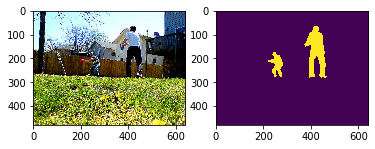

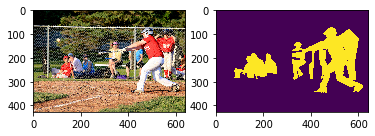

In [9]:
cat_id = 1
type_data = "train"


train_df = ldBin_ob.fetch_df_bin(cat_id,type_data)

masks = []

t = 2
for i in train_df.values:
    if t>0:
        img_id, img_path = i[0], i[1]
        print(img_id)
        reqd_mask = ldBin_ob.fetch_mask_bin(cat_id,img_id,"train")
        masks.append(reqd_mask)
        plt_ob.plot_img_and_mask(img_id,reqd_mask,img_path_df)
        # path = "./Plots/"+str(i[0])+".png"
        # plt.savefig(path)
    t-=1

In [10]:
from glob import glob
for i in glob("../data/coco/train2017/*214972*"):
    print(i)
    
for i in glob("../data/coco/train2017/*445425*"):
    print(i)
    

../data/coco/train2017/000000214972.jpg
../data/coco/train2017/000000445425.jpg


In [13]:
mask = masks[0]
img = plt.imread("../data/coco/train2017/000000214972.jpg")
mask = np.reshape(mask,(-1, mask.shape[0],mask.shape[1],1))
# img = np.reshape(img, (-1, img.shape[0],img.shape[1],img.shape[2]))

In [14]:
def mirror_batch(self, imgs, masks):

    ip = len(imgs)
    imgs_, masks_ = [], [] 
    for i,j in zip(imgs,masks):
        imgs_.append(i[:,::-1])
        masks_.append(j[:,::-1])


    for i,j in zip(imgs_,masks_):
        imgs.append(i)
        masks.append(j)

    # print("input {}".format(ip), " mirrored ",len(imgs),"*** mirrored")
    return imgs,masks

In [15]:
from skimage.transform import rotate
def rotate_batch(self, imgs, masks):

    ip = len(imgs)
    imgs_, masks_ = [], [] 
    for i,j in zip(imgs, masks):
        rn = np.random.randint(-20, 20)
        imgs_.append(rotate(i, angle=rn))
        masks_.append(rotate(j, angle=rn))

    for i,j in zip(imgs_,masks_):
        imgs.append(i)
        masks.append(j)

    # print("input {}".format(ip), " rotated ",len(imgs),"*** rotated")
    return imgs, masks


In [16]:
mirror_results = mirror_batch(0, [img], [mask])
len(mirror_results)

2

In [29]:
len(mirror_results[0])

2

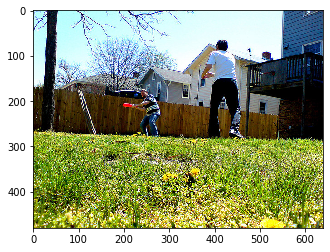

In [32]:
plt.imshow(np.squeeze(mirror_results[0][0]))

In [ ]:
rotate_results = rotate_batch(0, [img], [mask])